In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.impute import SimpleImputer


In [3]:
### 1. Import the raw data ###
cars=pd.read_csv('Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
### 2. Clean the data and remove missing values ###
# Remove missing values  - I removed any row that has any NaN value
# Try out imputing missing values rather than removing them?
#cars.dropna(axis=0,inplace=True)

# Update Luggage.room Corvet (12.6) and the RX-7 (17)
cars[cars['Model']=='Corvette']['Luggage.room']=12.6
cars[cars['Model']=='RX-7']['Luggage.room']=17
imp_avg=SimpleImputer(missing_values=np.nan, strategy='mean')
imp_zero=SimpleImputer(missing_values=np.nan, fill_value=0,strategy='constant')
imp_cyl=SimpleImputer(missing_values='rotor', fill_value=0, strategy='constant')
cars[['Luggage.room']]=imp_avg.fit_transform(cars[['Luggage.room']])
cars[['Cylinders']]=imp_cyl.fit_transform(cars[['Cylinders']])
cars[['Rear.seat.room']]=imp_zero.fit_transform(cars[['Rear.seat.room']])

# Drop any column that is not categorical or numeric 
# (all model and make are categroical and are unique for each row, so they would give no useful info)
cars.drop(columns=['Model','Make','Unnamed: 0'],inplace=True,errors='ignore')

# Manufacturer - Chrysler was misspelled (Chrylser)
cars.replace('Chrylser','Chrysler',inplace=True)

# Outliers - None that need to be worried about
cat_cols=list(cars.select_dtypes('object').columns)
outliers={} #A dictionary to easily see which columns have outliers and what values the outliers are
for column in cars.columns:
    if column in cat_cols:
        continue
    else:
        minflag=cars[column].mean()-3*cars[column].std()
        maxflag=cars[column].mean()+3*cars[column].std()
        if cars[column].min()<minflag or cars[column].max()>maxflag:            
            outliers[column]=cars[(cars[column]>maxflag)|(cars[column]<minflag)][column].sort_values().values
            print(f"Nonoutlier range in {column}: ({round(minflag,2)}, {round(maxflag,2)})")
            print('Outlier List:')
            print(outliers[column])
            print('')
        else:
            continue

# Consider removing Manufacturer?
cars.info()

Nonoutlier range in Min.Price: (-9.11, 43.36)
Outlier List:
[43.8 45.4]

Nonoutlier range in Price: (-9.47, 48.49)
Outlier List:
[61.9]

Nonoutlier range in Max.Price: (-11.19, 54.99)
Outlier List:
[80.]

Nonoutlier range in MPG.city: (5.51, 39.23)
Outlier List:
[42 46]

Nonoutlier range in MPG.highway: (13.09, 45.08)
Outlier List:
[46 50]

Nonoutlier range in Fuel.tank.capacity: (6.83, 26.5)
Outlier List:
[27.]

Nonoutlier range in Rear.seat.room: (12.17, 42.3)
Outlier List:
[0. 0.]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Type                93 non-null     object 
 2   Min.Price           93 non-null     float64
 3   Price               93 non-null     float64
 4   Max.Price           93 non-null     float64
 5   MPG.city            93 non-null     int64  
 6   MPG.highwa

C:\Users\jbartell\AppData\Local\Temp/ipykernel_67648/1153486407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars[cars['Model']=='Corvette']['Luggage.room']=12.6
C:\Users\jbartell\AppData\Local\Temp/ipykernel_67648/1153486407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars[cars['Model']=='RX-7']['Luggage.room']=17


In [5]:
### 3. Generate dummy variables for the categorical features ###
cars = pd.get_dummies(cars, drop_first=True)

In [6]:
### 4. Create a training set that's 75% of your dat set and a complementary test set with the remaining 25%. Specify random_state = 0 ###
X = cars.drop('MPG.highway',axis=1)
y = cars['MPG.highway']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
### 5. Train the model using the LinearRegression class. Leave all parameters at their default values ###
reg = LinearRegression().fit(X_train,y_train)

In [139]:
### 7. Print out the actual model in equation form ###
y_predict_lin=reg.predict(X_test)

equation=f"MPG.highway = {reg.intercept_:.3f}"
columns=""
for index, col in enumerate(X_train.columns):
    equation+=f" + {reg.coef_[index]:.3f} * {col}"
print(equation)

print('\nScore/Coefficient of Determination: ',reg.score(X_test,y_test))

MPG.highway = 45.147 + 6.599 * Min.Price + -13.953 * Price + 6.975 * Max.Price + 1.067 * MPG.city + 1.556 * EngineSize + -0.065 * Horsepower + 0.003 * RPM + 0.001 * Rev.per.mile + -0.163 * Fuel.tank.capacity + 1.654 * Passengers + 0.047 * Length + -0.505 * Wheelbase + -0.863 * Width + 0.304 * Turn.circle + -0.709 * Rear.seat.room + 0.998 * Luggage.room + 0.014 * Weight + -5.503 * Manufacturer_Audi + -3.720 * Manufacturer_BMW + 1.231 * Manufacturer_Buick + 16.795 * Manufacturer_Cadillac + -1.596 * Manufacturer_Chevrolet + -4.039 * Manufacturer_Chrysler + -3.845 * Manufacturer_Dodge + -3.737 * Manufacturer_Eagle + -2.442 * Manufacturer_Ford + 1.718 * Manufacturer_Geo + 2.777 * Manufacturer_Honda + -2.527 * Manufacturer_Hyundai + 10.792 * Manufacturer_Infiniti + -3.264 * Manufacturer_Lexus + -0.169 * Manufacturer_Lincoln + 0.154 * Manufacturer_Mazda + 2.305 * Manufacturer_Mercedes-Benz + -2.293 * Manufacturer_Mercury + -5.182 * Manufacturer_Mitsubishi + -5.722 * Manufacturer_Nissan + -0.1

In [146]:
### Run a Random Forest Regressor algorithm and compare ###

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Optimization - Could try using RandomizedSearchCV to speed this up

param_grid= {
    'n_estimators': [800,850,900,950,1000,1050,1100,1150,1200],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [8,9,10,11,12,None],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False]
}
rf=RandomForestRegressor(random_state=0)
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,verbose=3,cv=5)
rf_grid.fit(X_train, y_train)
print(f"The best parameters are: {rf_grid.best_params_}")

y_predict_forest = rf_grid.predict(X_test)

# Calculating Mean Square Error for both Linear Regression and Random Forest Regressor
MSE_forest=0
MSE_lin=0
for i in range(len(y_predict_forest)):
    MSE_forest += (list(y_test)[i]-y_predict_forest[i])**2/len(y_test)
    MSE_lin += (list(y_test)[i]-y_predict_lin[i])**2/len(y_test)
print(f"The MSE for forest was {MSE_forest:.2f} and the MSE for linear regression was {MSE_lin:.2f}")


Fitting 5 folds for each of 2970 candidates, totalling 14850 fits
The best parameters are: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
The MSE for forest was 3.87 and the MSE for linear regression was 22.67


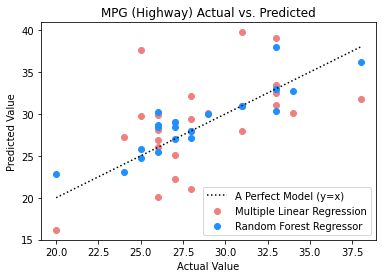

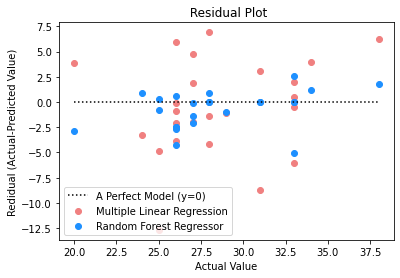

In [147]:
### Comparison MLR with RF ###

# Scatterplot with predicted values against actual values
fig=plt.figure()
ax=plt.axes()

x=np.linspace(min(y_test),max(y_test),1000)
ax.plot(x,x,color='black',linestyle='dotted',label='A Perfect Model (y=x)')

plt.scatter(x=y_test,y=y_predict_lin,c='lightcoral',label='Multiple Linear Regression')
plt.scatter(x=y_test,y=y_predict_forest,c='dodgerblue', label='Random Forest Regressor')
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('MPG (Highway) Actual vs. Predicted')

# Scatterplot with predicted values against actual values
fig2=plt.figure()
ax2=plt.axes()

ax2.plot(x,x*0,color='black',linestyle='dotted',label='A Perfect Model (y=0)')

y_residual=y_test-y_predict_lin
y_residual_forest=y_test-y_predict_forest
plt.scatter(x=y_test,y=y_residual,c='lightcoral',label='Multiple Linear Regression')
plt.scatter(x=y_test,y=y_residual_forest,c='dodgerblue',label='Random Forest Regressor')
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Redidual (Actual-Predicted Value)')
plt.title(' Residual Plot')
plt.show()

In [9]:
### The Default Random Forest Regression ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_default=RandomForestRegressor(random_state=0)
rf_default.fit(X_train,y_train)
y_predict_forest_default=rf_default.predict(X_test)


MSE_forest_default=0

for i in range(len(y_predict_forest_default)):
    MSE_forest_default += (list(y_test)[i]-y_predict_forest_default[i])**2/len(y_test)
print(f"The MSE for the default forest was {MSE_forest_default:.2f}")

The MSE for the default forest was 6.06
